In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
df = pd.read_csv('/content/car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


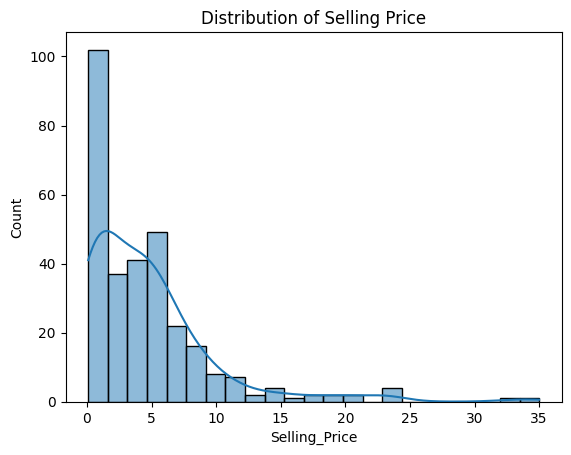

In [34]:
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

In [9]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [10]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-10-2d55ad1104b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-10-2d55ad1104b1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-10-2d55ad1104b1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [11]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [13]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.1, random_state=2)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
lin_reg_model = LinearRegression()

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lin_reg_model, x_train, y_train, cv=5, scoring='r2')
print('Cross-validated R Squared:', np.mean(cv_scores))

Cross-validated R Squared: 0.8308704298607099


In [17]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Prediction on traing data
training_data_prediction = lin_reg_model.predict(x_train)

In [19]:
# R Squred Error
error_score = metrics.r2_score(y_train,training_data_prediction)
print('R sqyred error:',error_score)

R sqyred error: 0.8799451660493711


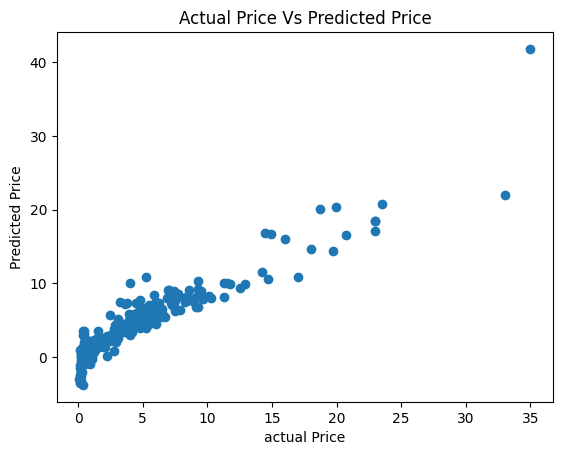

In [20]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel('actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [21]:
# Prediction on test data
test_data_prediction = lin_reg_model.predict(x_test)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, test_data_prediction)
print('Mean Absolute Error:', mae)

# Mean Squared Error
mse = mean_squared_error(y_test, test_data_prediction)
print('Mean Squared Error:', mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 1.0507413774170433
Mean Squared Error: 1.6983234006965484
Root Mean Squared Error: 1.3031973759552113


In [22]:
# R Squred Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R sqyred error:',error_score)

R sqyred error: 0.8365766715027051


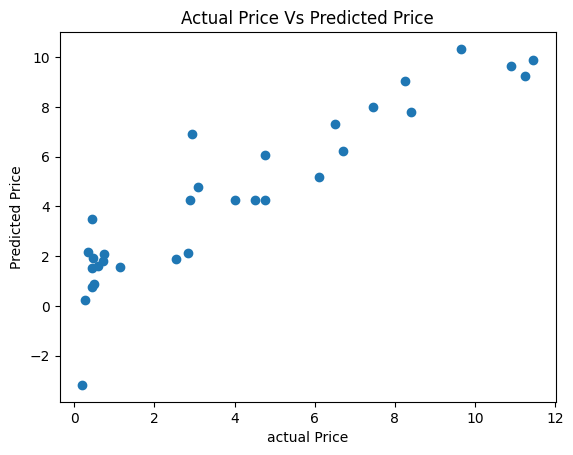

In [23]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [24]:
lasso_reg_model = Lasso()

In [25]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

In [26]:
train_data_prediction = lasso_reg_model.predict(x_train)

In [27]:
# find error using r squred error
error_score = metrics.r2_score(y_train, train_data_prediction)
print('R Sqered Error :',error_score)

R Sqered Error : 0.8427856123435794


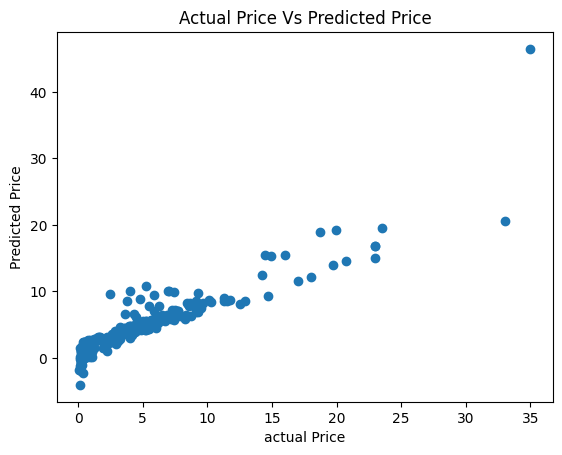

In [28]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel('actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [30]:
test_data_prediction = lasso_reg_model.predict(x_test)

In [32]:
# R squred Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('Squred error',error_score)

Squred error 0.8709167941173195


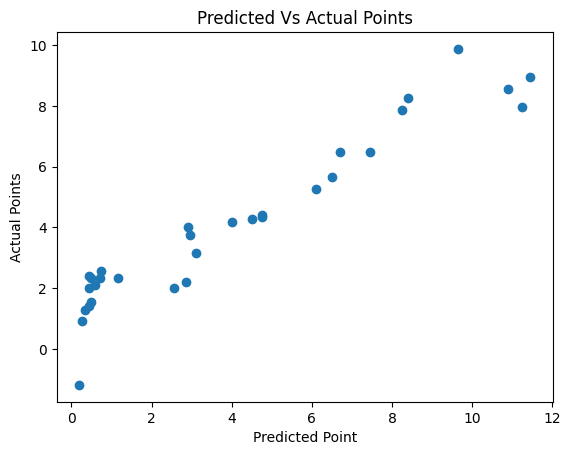

In [33]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Predicted Point")
plt.ylabel("Actual Points")
plt.title("Predicted Vs Actual Points")
plt.show()